<a href="https://colab.research.google.com/github/picazio/python-studies/blob/master/k_mean_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let’s take a look at how we could go about classifying data using the K-Means algorithm with python. Now we'll try to apply the clustering to a 3D problem. As always, we need to start by importing the required libraries.

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

Let's generate our own data using the make_blobs function from the sklearn.datasets module. The centers parameter specifies the number of clusters. In order to produce a 3D scatter plot, we had to use Axes3D.

(1000, 3)


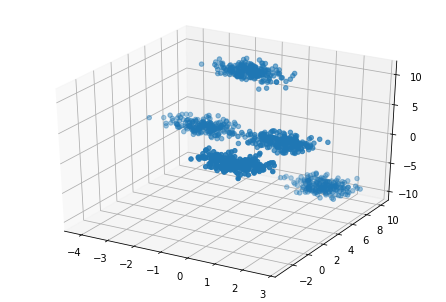

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=0, n_features=3)
print(X.shape)
#print(y)
ax.scatter(X[:,0], X[:,1],X[:,2])
#plt.show()

Even though we already know the optimal number of clusters (because we generated our test sample with 5 centers), we could still benefit from determining it using the **elbow method**. To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the *intertia_* property (WCSS) every time.

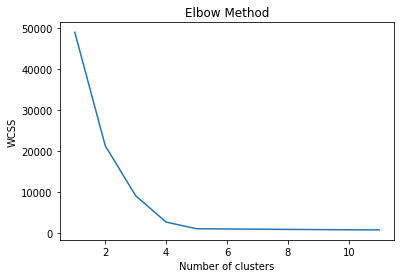

In [10]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Now we can categorize the data using the optimum number of clusters (5) we determined in the last step. *k-means++* ensures that you get don’t fall into the random initialization trap.

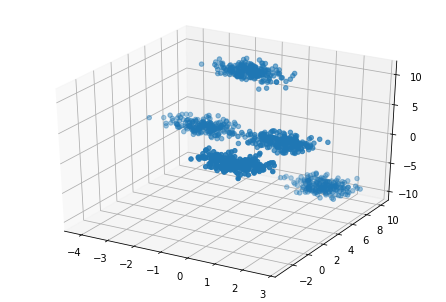

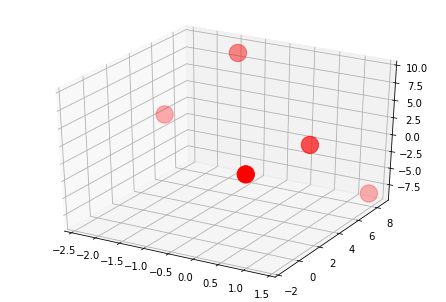

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
fig1 = plt.figure()
ax1 = Axes3D(fig1)
fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax1.scatter(X[:,0], X[:,1],X[:,2])
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red')
plt.show()